* **One-way ANOVA:** Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.
* **Two-way ANOVA:** Compares the means of one continuous dependent variable based on three or more groups of two categorical variables.


In [1]:
# Importing necessary packages for data analysis 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the diamons dataset from seaborn 
diamonds_data = sns.load_dataset("diamonds", cache=False)

# display the first 10 items
diamonds_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


our main focus is on one-way and two-way ANOVA. This means that our dataset needs a continuous variable, and up to two categorical variables.

**Note:** In the workplace, you will always start with a business problem and the data, and then determine the best models or tests to run on the data. You will *never* work in the reverse. For educational purposes, our goal is to teach you about ANOVA in this notebook and the accompanying resources.

In [3]:
# Checking how many diamonds are each color grade 
# using the .value_counts() method on the color column
    # returns a series  containing counts of unique values.
        # other cool attributes are ascending: bool, default false
        #bins : rather than count values, grouping them into half open bins
        #dropna: bool,default True ( Don't include NaN)

diamonds_data["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [4]:
# subset for colorless diamonds 
colorless = diamonds_data[diamonds_data["color"].isin(["E", "F", "H", "D", "I"])]

# Selecting only color and price columns, and reset index
colorless = colorless[['color','price']].reset_index(drop=True)

**Note:** We took a subset of colorless and near colorless diamonds. We excluded G color grade diamonds as there were many more of them, and we excluded J color grade diamonds as there were significantly fewer of them. In a workplace setting, you would typically go through a more thoughtful process of subsetting. The goal of this notebook is focusing on ANOVA, not data cleaning or variable selection.

In [5]:
# Removing dropped categories of diamond color
# this code took colorless dataframe and color column (must be a categorical type)
# removed the category values G and J from the category colors in the colorless dataframe
colorless.color = colorless.color.cat.remove_categories(["G", "J"])

#Checking that the dropped categories have been removed 
colorless['color'].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [6]:
# looking at the colorless dataset
colorless.head(10)

,color,price
0,E,326
1,E,326
2,E,327
3,I,334
4,I,336
5,H,337
6,E,337
7,H,338
8,F,342
9,E,345


In [7]:
# Importing the math package
import math

#Take the logarithm of the price, and insert it as the third column 
colorless.insert(loc=2, column="log_price", value=[math.log(price) for price in colorless["price"]])

In [8]:
# Taking a look at the new colorless dataframe
colorless.head()


,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [9]:
# saving to diamonds.csv
colorless.to_csv("diamonds.csv", index=False, header=list(colorless.columns))

**Note:** The code creates a new .csv file of the `colorless` dataframe, and names it `diamonds.csv`. The `index` argument tells the function whether or not we want to save the index column as a column in the .csv file. Additionally, the `header` argument tells the function what the names of the columns should be.

# One way ANOVA 

In [10]:
# saving dimonds csv file as diamonds 
diamonds = pd.read_csv("diamonds.csv")

In [11]:
# exploring the first 5 observations to see f it was imported correctly 
diamonds.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


We Recall that one-way ANOVA helps us better understand the relationship between a categorical variable and a continuous variable. We'll do some basic exploratory data analysis by creating a boxplot using the `boxplot()` function from the `seaborn` package.

Based on the plot, we can observe that there is a lot of overlap in the distribution of `log_price` for each color of diamond. But we can't tell yet if they are statistically significantly different.

In [12]:
diamonds["color"].unique()

array(['E', 'I', 'H', 'F', 'D'], dtype=object)

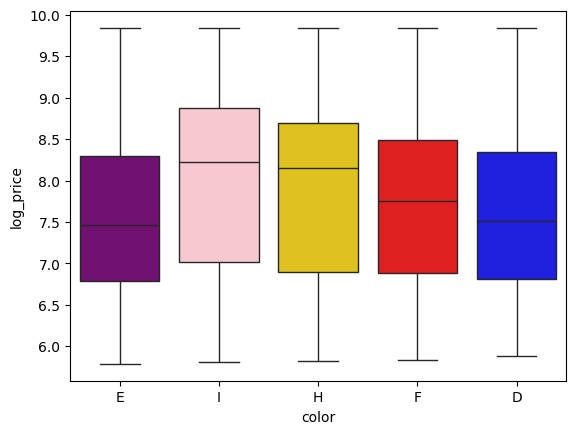

In [13]:
# creating a boxplot to show distribution of rpice by color grade 
sns.boxplot(x="color",
            y="log_price", 
            data=diamonds,
            hue="color",
            palette={
                'E': 'purple', 
                'I': 'pink', 
                'H': 'gold', 
                'F':'red', 
                'D':'blue'
                }
            )
plt.show()
#it is important to assign hue="color" before passing palettes

In order to run ANOVA, we need to create a regression model. To do this, we'll import the `statsmodels.api` package and the `ols()` function. Next, we'll create a simple linear regression model where the X variable is `color`, which we will code as categorical using `C()`. Then, we'll fit the model to the data, and generate model summary statistics.

In [17]:
#Importing statsmodels and ols function
import statsmodels.api as sm
from  statsmodels.formula.api import ols

In [18]:
# constructing simple linear regression model, and fitting the model
ols_formula = "log_price ~ C(color)"

# creating the model
OLS = ols(formula=ols_formula, data=diamonds)

#fitting the model
model = OLS.fit()


In [19]:
#getting the model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 19 Nov 2025   Prob (F-statistic):          3.61e-225
Time:                        15:15:56   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, the color grades' associated beta coefficients all have a p-value of less than 0.05 (check the `P>|t|` column). But we can't be sure if there is a significant price difference between the various color grades. This is where one-way ANOVA comes in.

First, we have to state our null and alternative hypotheses:

#### Null Hypothesis

$$H_0: price_D=price_E=price_F=price_H=price_I$$

There is no difference in the price of diamonds based on color grade.

#### Alternative Hypothesis

$$H_1: \text{Not } price_D=price_E=price_F=price_H=price_I$$

There is a difference in the price of diamonds based on color grade.